# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading

In [2]:
df=pd.read_csv("../netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# 3. Exploring Data

In [3]:
df.shape

(8790, 10)

In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# 4. Data Cleaning

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

In [11]:
df['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8790 entries, 0 to 8789
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8790 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.8 KB


In [12]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 5. Visualization

# Total Content on Netflix

In [13]:
type_counts = df['type'].value_counts()
type_counts

Movie      6126
TV Show    2664
Name: type, dtype: int64

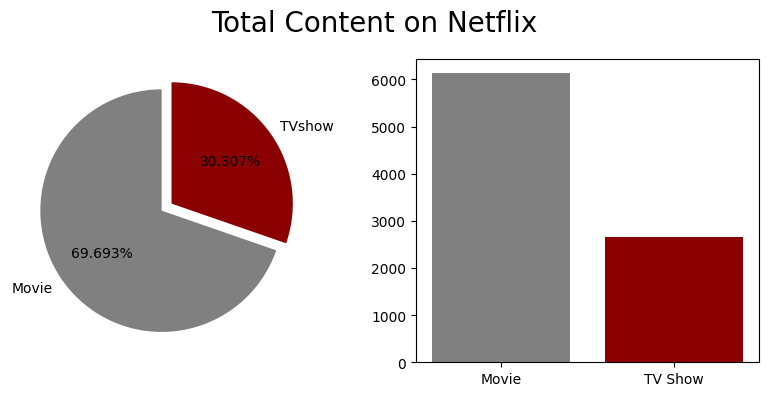

In [14]:
colors = ['#808080', '#8B0000']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart
axs[0].pie(type_counts, labels=['Movie', 'TVshow'], autopct='%1.3f%%', explode=[0, 0.1], startangle=90, colors=colors)

# Bar chart
axs[1].bar(type_counts.index, type_counts.values, color=colors)
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()


#  Top 10 countries with Netflix Content

In [17]:
top_countries = df['country'].value_counts().reset_index().rename(columns={'index': 'country', 'country': 'count'}).sort_values(by='count', ascending=False).head(10)
top_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


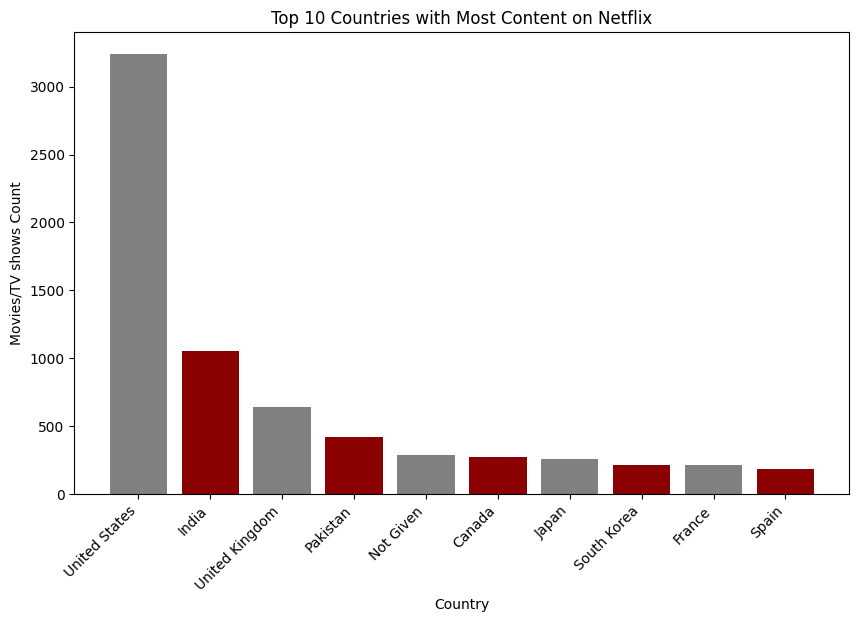

In [18]:
colors_bar = ['#808080', '#8B0000']
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['count'], color=colors_bar)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Movies/TV shows Count' )
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Monthly Trend of Movie and TV Show Releases

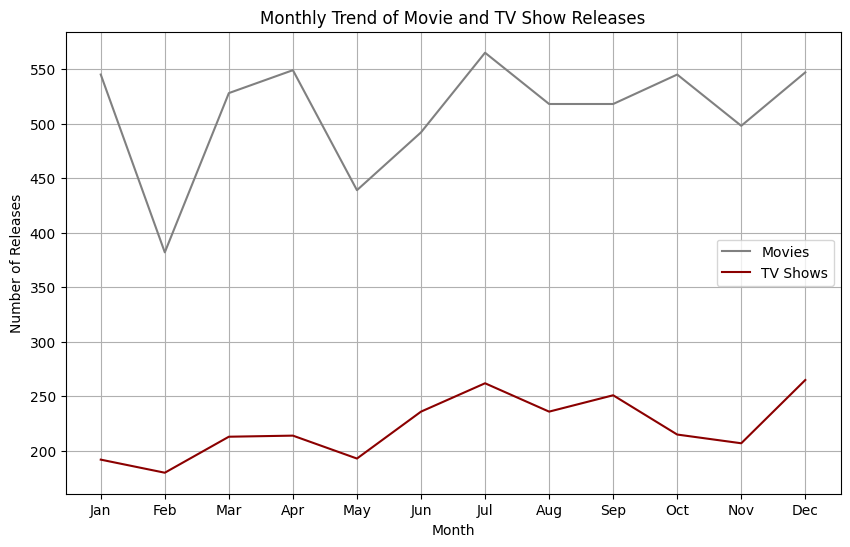

In [19]:
df['month_added'] = df['date_added'].dt.month

movie_monthly_counts = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
tv_show_monthly_counts = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()
color_movie = '#808080'  # gray
color_tv_show = '#8B0000'  # dark red
plt.figure(figsize=(10, 6))
plt.plot(movie_monthly_counts.index, movie_monthly_counts.values,color=color_movie, label='Movies')
plt.plot(tv_show_monthly_counts.index, tv_show_monthly_counts.values,color=color_tv_show,label='TV Shows')
plt.title('Monthly Trend of Movie and TV Show Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()



In [34]:
tv_show_monthly_counts

1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: month_added, dtype: int64

#  Yearly Trend of Movie and TV Show Releases

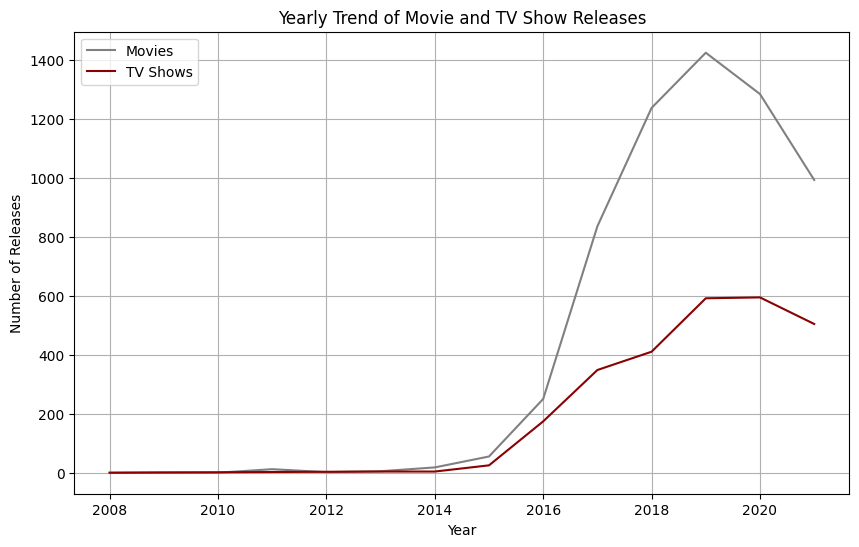

In [20]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
movie_yearly_counts = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tv_show_yearly_counts = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()
color_movie = '#808080'  # gray
color_tv_show = '#8B0000'  # dark red
plt.figure(figsize=(10, 6))
plt.plot(movie_yearly_counts.index, movie_yearly_counts.values, label='Movies',color=color_movie)
plt.plot(tv_show_yearly_counts.index, tv_show_yearly_counts.values, label='TV Shows',color=color_tv_show)
plt.title('Yearly Trend of Movie and TV Show Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
tv_show_yearly_counts

2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: year_added, dtype: int64

# Top 10 Movies

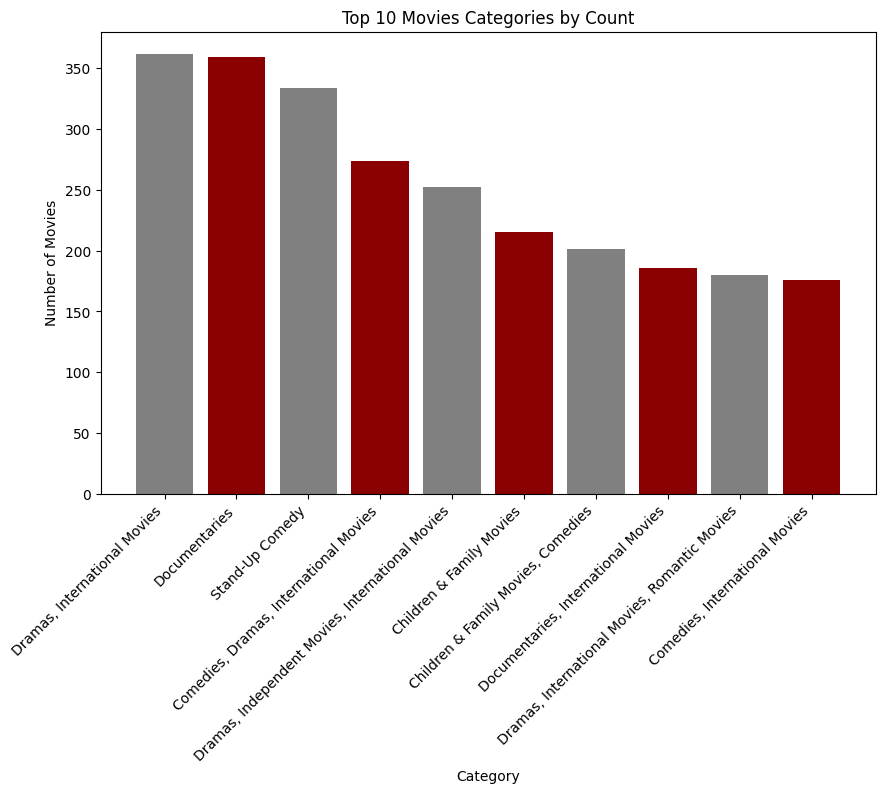

In [30]:
colors = ['#808080', '#8B0000']
top_10_movies_by_category = df[df['type'] == 'Movie'].groupby('listed_in').size().nlargest(10)

top_10_movies_by_category = top_10_movies_by_category.reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.bar(top_10_movies_by_category['listed_in'], top_10_movies_by_category['count'], color=colors )
plt.title('Top 10 Movies Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()


In [31]:
top_10_movies_by_category 

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


# Top 10 TV Show

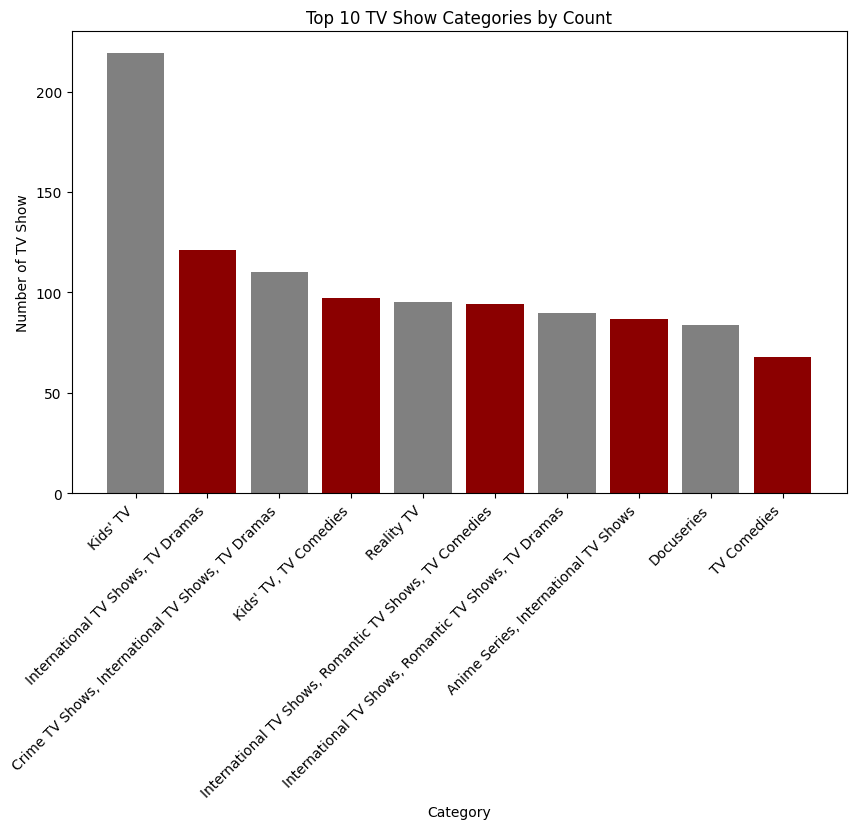

In [22]:
colors = ['#808080', '#8B0000']
top_10_TVShow_by_category = df[df['type'] == 'TV Show'].groupby('listed_in').size().nlargest(10)
top_10_TVShow_by_category = top_10_TVShow_by_category.reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(top_10_TVShow_by_category['listed_in'], top_10_TVShow_by_category['count'], color=colors )
plt.title('Top 10 TV Show Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of TV Show')
plt.xticks(rotation=45, ha='right')  
plt.show()


In [32]:
top_10_TVShow_by_category

,listed_in,count
0,Kids' TV,219
1,"International TV Shows, TV Dramas",121
2,"Crime TV Shows, International TV Shows, TV Dramas",110
3,"Kids' TV, TV Comedies",97
4,Reality TV,95
5,"International TV Shows, Romantic TV Shows, TV ...",94
6,"International TV Shows, Romantic TV Shows, TV ...",90
7,"Anime Series, International TV Shows",87
8,Docuseries,84
9,TV Comedies,68
